# Dermaology dataset

In [1]:
# import dataset from kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")
print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")

print("Path to dataset files:")

/home/nina/Work/ML/IgniteML/tfenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/nina/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5
Path to dataset files: /home/nina/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5
Path to dataset files: /home/nina/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5
Path to dataset files:


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

2025-05-29 16:53:24.995918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-29 16:53:25.130752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-05-29 16:53:25.130769: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-05-29 16:53:25.158919: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 16:53:25.816323: W tensorflow/stream_executor/platform/de

In [3]:
# create dataframe
df = pd.read_csv(f'{path}/dermatology_database_1.csv')
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [5]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [6]:
df['age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [7]:
df['age'] = np.where(df['age']=='?',np.NAN, df['age'])
df['age_int'] = df['age'].astype('Int64')
df['age_int'].describe()

count        358.0
mean     36.296089
std      15.324557
min            0.0
25%           25.0
50%           35.0
75%          49.75
max           75.0
Name: age_int, dtype: Float64

In [31]:
df['age_int'] = df['age_int'].fillna(df['age_int'].median())
df['age_int'].describe()

count        366.0
mean      36.26776
std      15.156875
min            0.0
25%           25.0
50%           35.0
75%           48.0
max           75.0
Name: age_int, dtype: Float64

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


<Axes: >

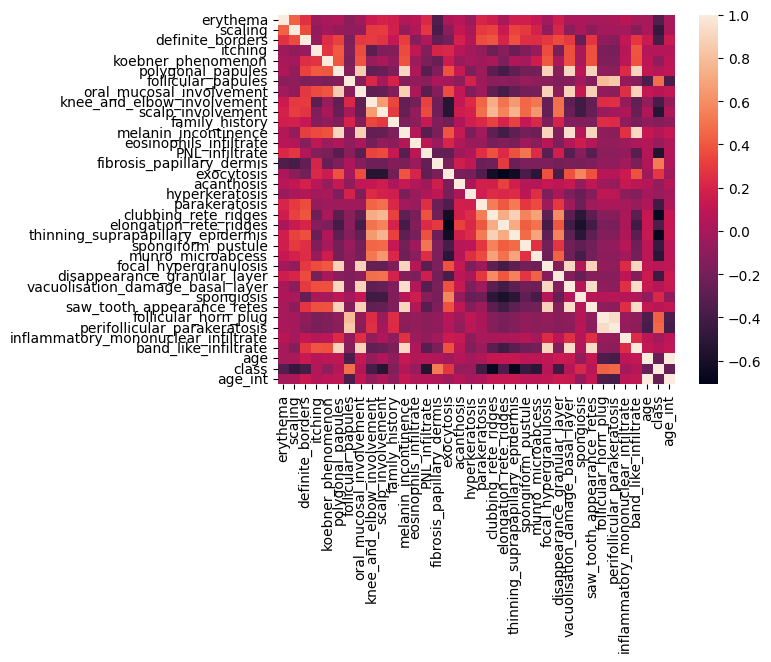

In [9]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [58]:
df_short = df.drop(columns=[
    'age',
    'focal_hypergranulosis',
    'vacuolisation_damage_basal_layer',
    'saw_tooth_appearance_retes',
    'perifollicular_parakeratosis',
    'inflammatory_mononuclear_infiltrate'],
    axis=1)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_short, test_size=0.2, random_state=42)

In [59]:
X = train_set.drop(columns=['class'],axis=1)
y = train_set['class']

In [60]:
X_test = test_set.drop(columns=['class'],axis=1)
y_test = test_set['class']

In [ ]:
df_full = df.drop(columns='age',axis=1)
full_train_set, full_test_set = train_test_split(df_full, test_size=0.2, random_state=42)
X_full = full_train_set.drop(columns=['class'],axis=1)
y_full = full_train_set['class']

In [ ]:
X_full_test = full_test_set.drop(columns=['class'],axis=1)
y_full_test = full_test_set['class']

In [34]:
from sklearn.pipeline import Pipeline
import sklearn

sklearn.set_config(enable_metadata_routing=True)
num_pipeline = Pipeline([
("impute", SimpleImputer(strategy="median")),
("standardize", MinMaxScaler()),
])

from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(
    transformers = [("num", num_pipeline, ['age_int'])],
    remainder='passthrough',
    force_int_remainder_cols=False
)


In [35]:
log_reg = Pipeline([('preprocessor', preprocessing), ('classifier', LogisticRegression())])

In [54]:
def eval_predictions(classifier, X, y):
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)
    return {
        'Accuracy': accuracy,
        'Precision (avg)': report['weighted avg']['precision'],
        'Recall (avg)': report['weighted avg']['recall']
    }

def eval_classifier(classifier, X, y, X_test, y_test):
    results = {}
    classifier.fit(X,y)
    results['train'] = eval_predictions(classifier, X, y)
    results['test'] = eval_predictions(classifier, X_test, y_test)
    return results
    


In [61]:
classifiers = {
    'Logistic Regression': log_reg,
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier()
}
results = {}

for name, classifier in classifiers.items():
    results[name] = {
        'short': eval_classifier(classifier, X, y, X_test, y_test),
        'full': eval_classifier(classifier, X_full, y_full, X_full_test, y_full_test)
    }

In [62]:
from pprint import pprint

pprint(results)

{'Decision Tree': {'full': {'test': {'Accuracy': 0.9864864864864865,
                                     'Precision (avg)': 0.9869087837837838,
                                     'Recall (avg)': 0.9864864864864865},
                            'train': {'Accuracy': 1.0,
                                      'Precision (avg)': 1.0,
                                      'Recall (avg)': 1.0}},
                   'short': {'test': {'Accuracy': 0.9594594594594594,
                                      'Precision (avg)': 0.9610974610974612,
                                      'Recall (avg)': 0.9594594594594594},
                             'train': {'Accuracy': 1.0,
                                       'Precision (avg)': 1.0,
                                       'Recall (avg)': 1.0}}},
 'Logistic Regression': {'full': {'test': {'Accuracy': 0.9864864864864865,
                                           'Precision (avg)': 0.9878378378378377,
                                          